# Predicting Lending Club's issued loans using Deep Learning in Tensorflow and Keras

The data contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. 

The dataset is a matrix of about 890 thousand observations and 75 variables. Data is available at : https://www.kaggle.com/wendykan/lending-club-loan-data

The task is to predict the status of the Loan as Good or Bad. Analysis is done in Tensorflow and Keras in Python

Lets begin by importing the libraries

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.INFO)

Now read in the dataset.

In [2]:
#Importing the dataset
dataset = pd.read_csv("Loan.csv",low_memory=False)

In [3]:
dataset.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Observed that the dataset is quite large, with 800,000 observations. Due to resource limitation, we limit data to only the first 100,000 records.

## Data Preprocessing

In [5]:
# limit data to only the first 100,000 records.
dataset = dataset[:100000]

Lets plot the target variable `loan_status` and observe the count values

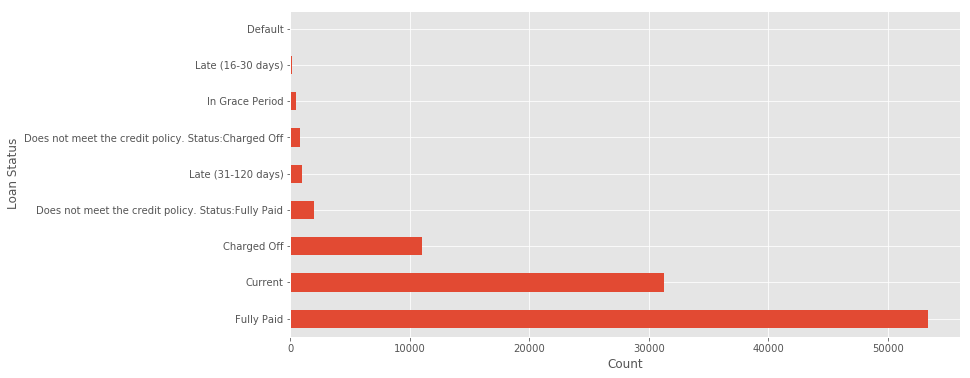

In [6]:
# Plot Loan Status
plt.figure(figsize= (12,6))
plt.ylabel('Loan Status')
plt.xlabel('Count')
dataset['loan_status'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

The target variable has a bit skewed distribution, with a larger number of observations falling into the `Fully Paid` category.

After a successfull inspection of the available feature variables, we will drop some of the feature variables as below. The possible reasons for dropping a variable being either a time-series variable such as dates or months, having no variablility in distribution or having majority of zero values.

In [7]:
# Drop these features for now
dataset.drop([    'id',
             'member_id',
             'emp_title',
             'title',
             'url',
             'zip_code',
             'issue_d',# time-series data, expands model dimension for more than 100
             'pymnt_plan',#Same value
             'earliest_cr_line',
             'out_prncp', 
             'out_prncp_inv',
             'total_rec_late_fee',
             'recoveries', 
             'collection_recovery_fee',
             'last_pymnt_d',
             'next_pymnt_d',
             'desc',
             'last_credit_pull_d',
             'collections_12_mths_ex_med',
             'policy_code',
             'application_type',
             'acc_now_delinq',
             'tot_coll_amt',
             'tot_cur_bal'], axis=1, inplace=True)

In [8]:
# Show records number
dataset.count().sort_values()

inq_last_12m                        0
annual_inc_joint                    0
dti_joint                           0
verification_status_joint           0
open_acc_6m                         0
open_il_6m                          0
open_il_12m                         0
total_cu_tl                         0
mths_since_rcnt_il                  0
open_il_24m                         0
il_util                             0
open_rv_12m                         0
open_rv_24m                         0
max_bal_bc                          0
all_util                            0
inq_fi                              0
total_bal_il                        0
mths_since_last_record          10851
mths_since_last_major_derog     12309
mths_since_last_delinq          41922
total_rev_hi_lim                57465
revol_util                      99874
total_acc                       99971
pub_rec                         99971
open_acc                        99971
inq_last_6mths                  99971
delinq_2yrs 

Observe that there are plenty of missing values. So we drop columns with less than 25% data

In [9]:
# Drop columns with less than 25% data.
lack_of_data_idx = [x for x in dataset.count() < 100000*0.25]
dataset.drop(dataset.columns[lack_of_data_idx], 1, inplace=True)

In [10]:
dataset.count().sort_values()

mths_since_last_delinq     41922
total_rev_hi_lim           57465
revol_util                 99874
total_acc                  99971
pub_rec                    99971
open_acc                   99971
inq_last_6mths             99971
delinq_2yrs                99971
annual_inc                 99996
total_rec_int             100000
total_rec_prncp           100000
total_pymnt_inv           100000
total_pymnt               100000
initial_list_status       100000
revol_bal                 100000
loan_amnt                 100000
addr_state                100000
purpose                   100000
loan_status               100000
verification_status       100000
home_ownership            100000
emp_length                100000
sub_grade                 100000
grade                     100000
installment               100000
int_rate                  100000
term                      100000
funded_amnt_inv           100000
funded_amnt               100000
last_pymnt_amnt           100000
dti       

In [11]:
# After Deletion
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
loan_amnt                 100000 non-null float64
funded_amnt               100000 non-null float64
funded_amnt_inv           100000 non-null float64
term                      100000 non-null object
int_rate                  100000 non-null float64
installment               100000 non-null float64
grade                     100000 non-null object
sub_grade                 100000 non-null object
emp_length                100000 non-null object
home_ownership            100000 non-null object
annual_inc                99996 non-null float64
verification_status       100000 non-null object
loan_status               100000 non-null object
purpose                   100000 non-null object
addr_state                100000 non-null object
dti                       100000 non-null float64
delinq_2yrs               99971 non-null float64
inq_last_6mths            99971 non-null float64
mt

Also, lets drop some variables with NA values

In [12]:
dataset.dropna(inplace=True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26290 entries, 42537 to 99998
Data columns (total 31 columns):
loan_amnt                 26290 non-null float64
funded_amnt               26290 non-null float64
funded_amnt_inv           26290 non-null float64
term                      26290 non-null object
int_rate                  26290 non-null float64
installment               26290 non-null float64
grade                     26290 non-null object
sub_grade                 26290 non-null object
emp_length                26290 non-null object
home_ownership            26290 non-null object
annual_inc                26290 non-null float64
verification_status       26290 non-null object
loan_status               26290 non-null object
purpose                   26290 non-null object
addr_state                26290 non-null object
dti                       26290 non-null float64
delinq_2yrs               26290 non-null float64
inq_last_6mths            26290 non-null float64
mths_since_las

The dataset is now good to go for Deep Learning. Lets view the first few observations.

In [14]:
dataset.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,total_rev_hi_lim
42537,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,...,13168.0,21.6,22.0,w,8842.800000,8842.80,7733.38,1109.42,368.45,61100.0
42538,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,...,5572.0,68.8,32.0,w,13359.770000,13359.77,11999.99,1359.78,119.17,8100.0
42539,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,...,11431.0,74.2,29.0,w,11431.200000,11431.20,9550.73,1880.47,476.30,15400.0
42541,14000.0,14000.0,14000.0,36 months,12.85,470.71,B,B4,4 years,RENT,...,3686.0,81.9,14.0,f,11296.940000,11296.94,8725.90,2571.04,470.71,4500.0
42543,10000.0,10000.0,10000.0,36 months,9.67,321.13,B,B1,7 years,MORTGAGE,...,9912.0,44.4,22.0,f,7706.810000,7706.81,6340.88,1365.93,321.13,22300.0
42544,3000.0,3000.0,3000.0,36 months,12.85,100.87,B,B4,10+ years,RENT,...,2875.0,54.2,26.0,f,3181.532981,3181.53,3000.00,181.53,2677.23,5300.0
42547,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,D5,6 years,MORTGAGE,...,27003.0,82.8,24.0,f,17538.170000,17538.17,7928.36,9609.81,730.78,32600.0
42548,11100.0,11100.0,11100.0,36 months,14.98,384.68,C,C3,10+ years,MORTGAGE,...,6619.0,66.2,12.0,f,9231.840000,9231.84,6837.40,2394.44,384.68,10000.0
42555,20800.0,20800.0,20800.0,36 months,13.53,706.16,B,B5,10+ years,RENT,...,23473.0,54.5,41.0,f,23926.294610,23926.29,20800.00,3126.29,13334.93,43100.0
42558,4500.0,4500.0,4500.0,36 months,19.22,165.46,D,D4,10+ years,RENT,...,19090.0,93.1,10.0,f,3970.850000,3970.85,2706.79,1264.06,165.46,20500.0


Rename some features to concur with some algorithms,

In [15]:
dataset = dataset.rename(columns= {'emp_length_< 1 year':'emp_length_lt_1 year',
                         'emp_length_n/a':'emp_length_na'})

### Preparing the target features

There are many classes in loan_status feature. However, lets divide it into 3 classses:
1. bad, 
2. warning 
3. safe.

In [16]:
bad_index = ['Charged Off',
             'Does not meet the credit policy. Status:Charged Off',
             'Default'
             ]

warning_index = ['Late (31-120 days)',
                 'Late (16-30 days)',
                 'In Grace Period'          # (Late (1-15 days)
                 ]

safe_index = ['Fully Paid',
              'Does not meet the credit policy. Status:Fully Paid'
              ]

In [17]:
def func(x):
    if x['loan_status'] in bad_index:
        return 0
    elif x['loan_status'] in warning_index:
        return 1
    else:
        return 2

dataset['loan_status_coded'] = dataset.apply(func, axis=1)
dataset.drop('loan_status', axis=1, inplace=True)

Thus our new target variable for predictions is `loan_status_coded`

In [18]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,total_rev_hi_lim,loan_status_coded
42537,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,...,21.6,22.0,w,8842.80,8842.80,7733.38,1109.42,368.45,61100.0,2
42538,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,...,68.8,32.0,w,13359.77,13359.77,11999.99,1359.78,119.17,8100.0,2
42539,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,...,74.2,29.0,w,11431.20,11431.20,9550.73,1880.47,476.30,15400.0,2
42541,14000.0,14000.0,14000.0,36 months,12.85,470.71,B,B4,4 years,RENT,...,81.9,14.0,f,11296.94,11296.94,8725.90,2571.04,470.71,4500.0,2
42543,10000.0,10000.0,10000.0,36 months,9.67,321.13,B,B1,7 years,MORTGAGE,...,44.4,22.0,f,7706.81,7706.81,6340.88,1365.93,321.13,22300.0,2


In [19]:
dataset.select_dtypes(include=['int','float','object']).dtypes

loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs               float64
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status        object
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
last_pymnt_amnt           float64
total_rev_hi_l

We have too many categorical variables to deal with, as evident from above.

## Feature Engineering with Exploratory Data Analysis
Now, we have pre-processed data table as loan. Let's explore distribution of some relevant features to understand data.

### loan_amnt: 

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

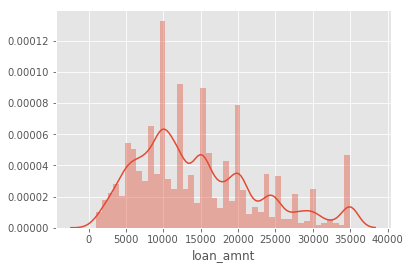

In [20]:
sns.distplot(dataset["loan_amnt"])

### funded_amnt, funded_amnt_inv
funded_amnt: The total amount committed to that loan at that point in time.

funded_amnt_inv: The total amount committed by investors for that loan at that point in time.

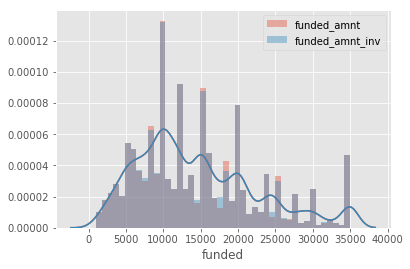

In [21]:
plt.figure()
sns.distplot(dataset["funded_amnt"], label="funded_amnt")
sns.distplot(dataset["funded_amnt_inv"], label="funded_amnt_inv")
plt.legend()
plt.xlabel("funded")
plt.show()

### term
term: The number of payments on the loan. Values are in months and can be either 36 or 60.

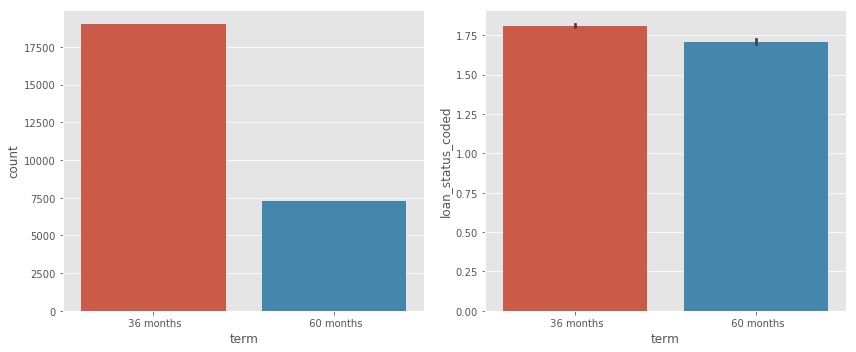

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["term"])
plt.subplot(1,2,2)
sns.barplot(x="term", y="loan_status_coded", data=dataset)
plt.tight_layout()
plt.show()

### int_rate
int_rate: Interest Rate on the loan

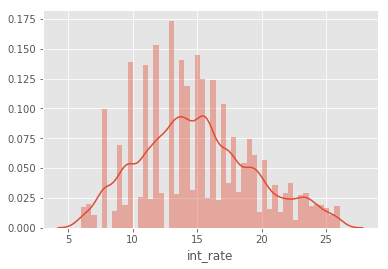

In [23]:
sns.distplot(dataset["int_rate"])

### installment
installment: The monthly payment owed by the borrower if the loan originates.

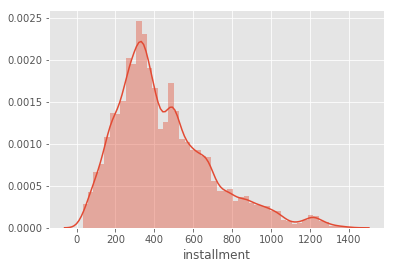

In [24]:
sns.distplot(dataset["installment"])

### grade, sub_grade
grade: LC assigned loan grade

sub_grade: LC assigned loan subgrade

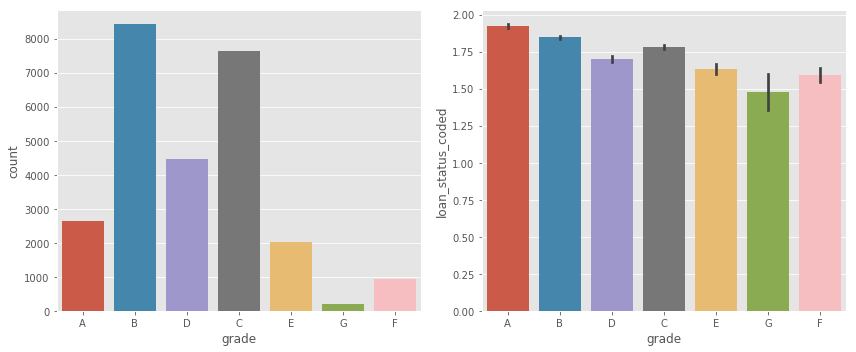

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["grade"])
plt.subplot(1,2,2)
sns.barplot(x="grade", y="loan_status_coded", data=dataset)
plt.tight_layout()
plt.show()

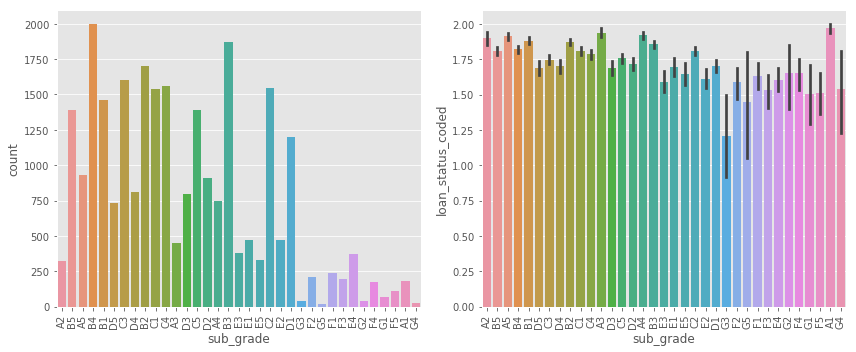

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["sub_grade"])
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
sns.barplot(x="sub_grade", y="loan_status_coded", data=dataset)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### emp_length
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

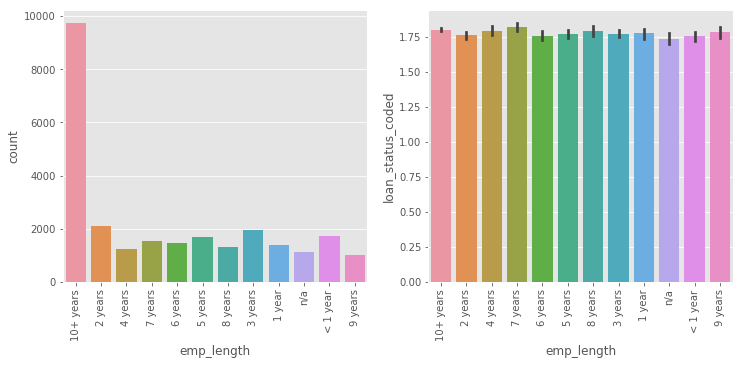

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["emp_length"])
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
sns.barplot(x="emp_length", y="loan_status_coded", data=dataset)
plt.xticks(rotation='vertical')
plt.show()

### home_ownership
home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

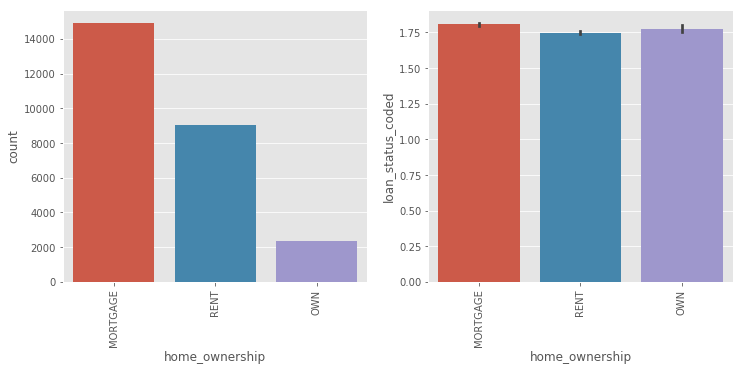

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["home_ownership"])
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
sns.barplot(x="home_ownership", y="loan_status_coded", data=dataset)
plt.xticks(rotation='vertical')
plt.show()

### annual_inc
annual_inc: The self-reported annual income provided by the borrower during registration.

We can see that annual_inc is heavily skewed with outlier.

(0, 300000)

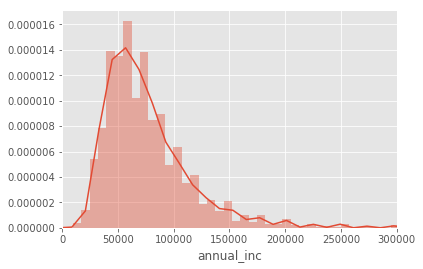

In [29]:
sns.distplot(dataset["annual_inc"], bins=200)
plt.xlim(0,300000)

### verification_status
verification_status

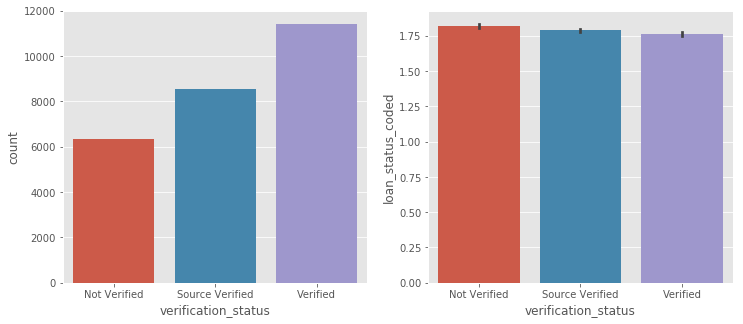

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["verification_status"])
plt.subplot(1,2,2)
sns.barplot(x="verification_status", y="loan_status_coded", data=dataset)
plt.show()

### purpose
purpose: A category provided by the borrower for the loan request.

In [31]:
dataset.purpose.value_counts()

debt_consolidation    16027
credit_card            6151
home_improvement       1407
other                  1264
major_purchase          405
small_business          278
medical                 212
car                     161
moving                  124
vacation                106
house                   100
wedding                  46
renewable_energy          9
Name: purpose, dtype: int64

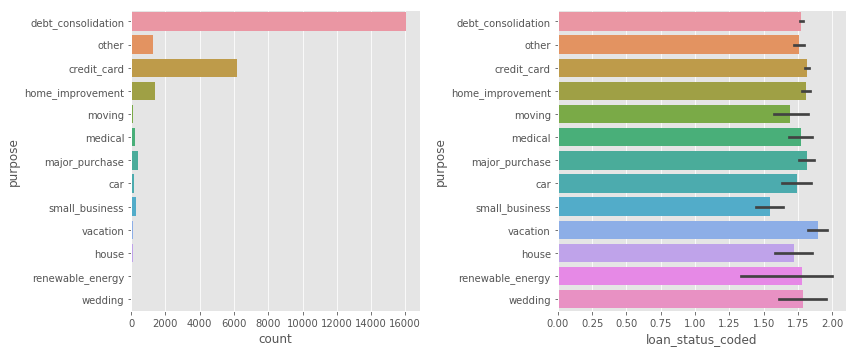

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(y=dataset["purpose"])
plt.subplot(1,2,2)
sns.barplot(y="purpose", x="loan_status_coded", data=dataset)
plt.tight_layout()
plt.show()

### addr_state
addr_state: The state provided by the borrower in the loan application

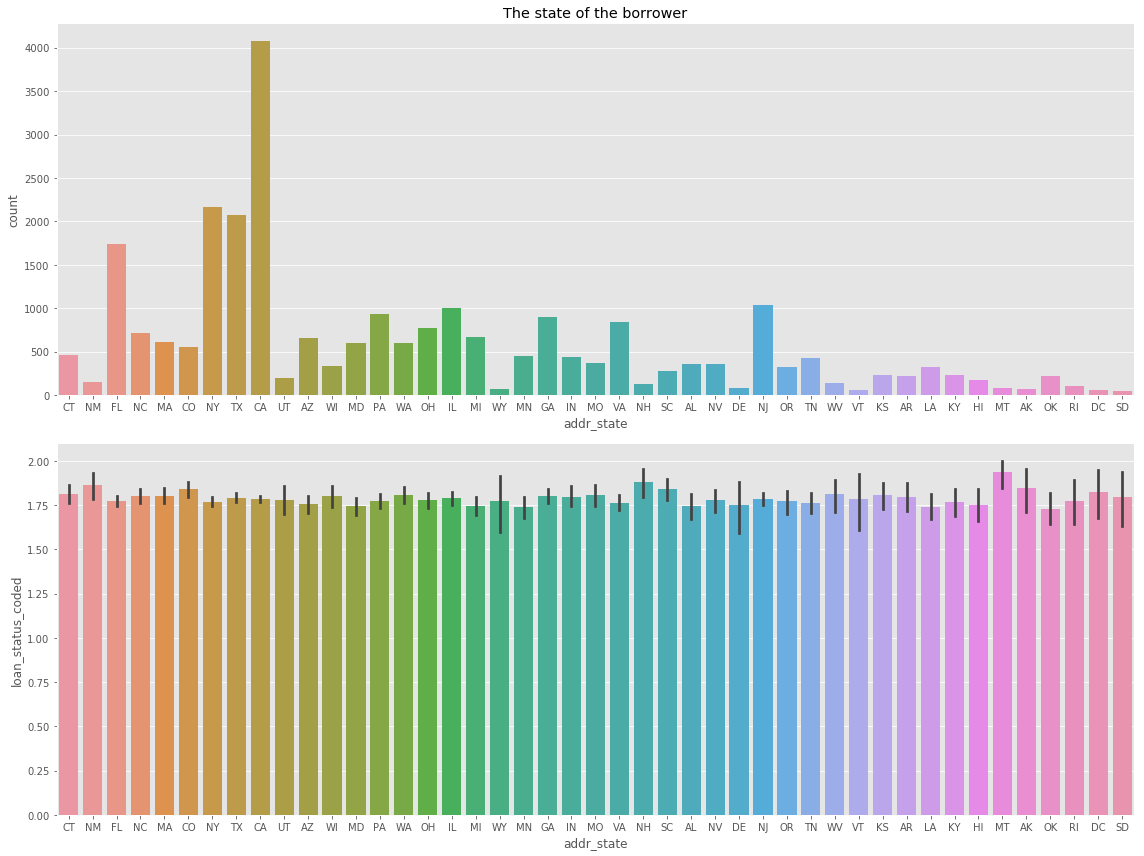

In [33]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.title('The state of the borrower')
sns.countplot(dataset["addr_state"])
plt.subplot(2,1,2)
sns.barplot(x="addr_state", y="loan_status_coded", data=dataset)
plt.tight_layout()
plt.show()

### dti
dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income

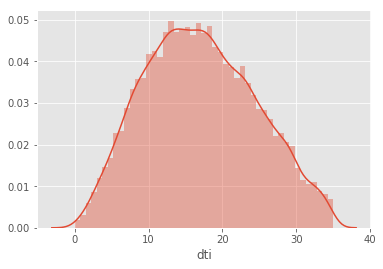

In [34]:
sns.distplot(dataset.dti)

### delinq_2yrs
delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

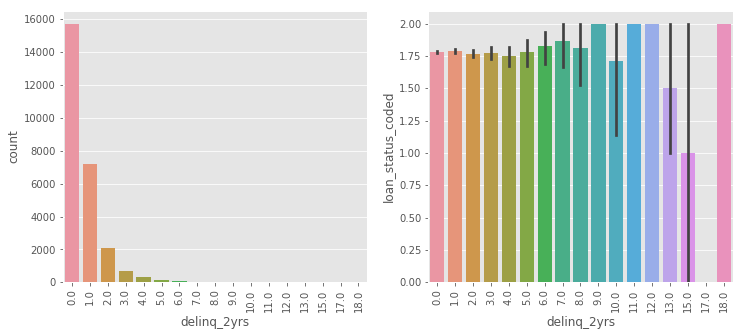

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["delinq_2yrs"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x="delinq_2yrs", y="loan_status_coded", data=dataset)
plt.xticks(rotation="vertical")
plt.show()

### inq_last_6mths
inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

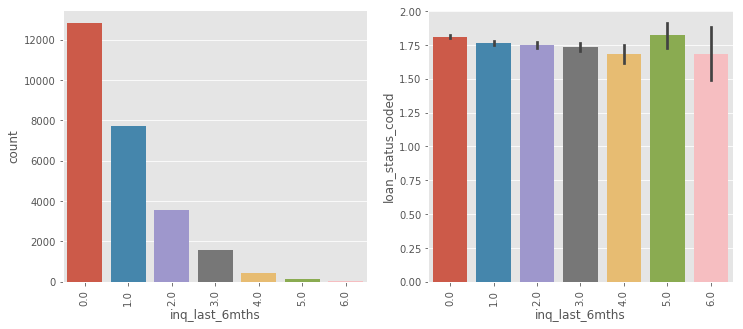

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["inq_last_6mths"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x="inq_last_6mths", y="loan_status_coded", data=dataset)
plt.xticks(rotation="vertical")
plt.show()

### inq_last_6mths
inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

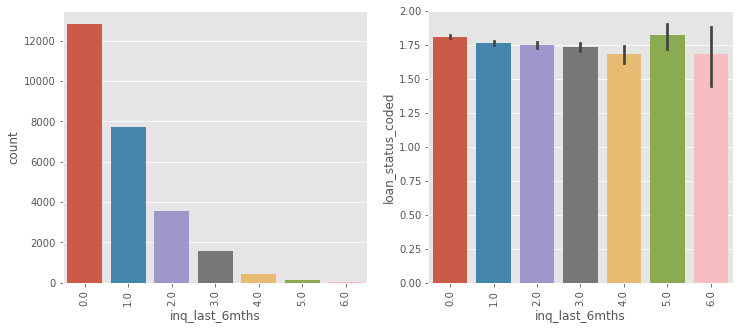

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["inq_last_6mths"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x="inq_last_6mths", y="loan_status_coded", data=dataset)
plt.xticks(rotation="vertical")
plt.show()

### open_acc
open_acc: The number of open credit lines in the borrower's credit file.

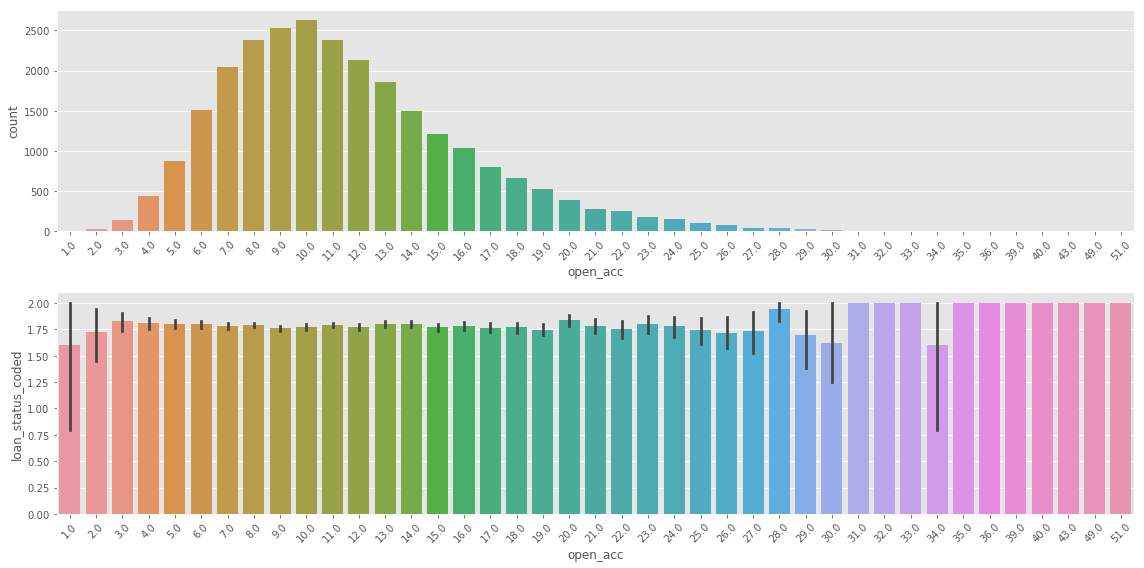

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(dataset["open_acc"])
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x="open_acc", y="loan_status_coded", data=dataset)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### pub_rec
pub_rec: Number of derogatory public records

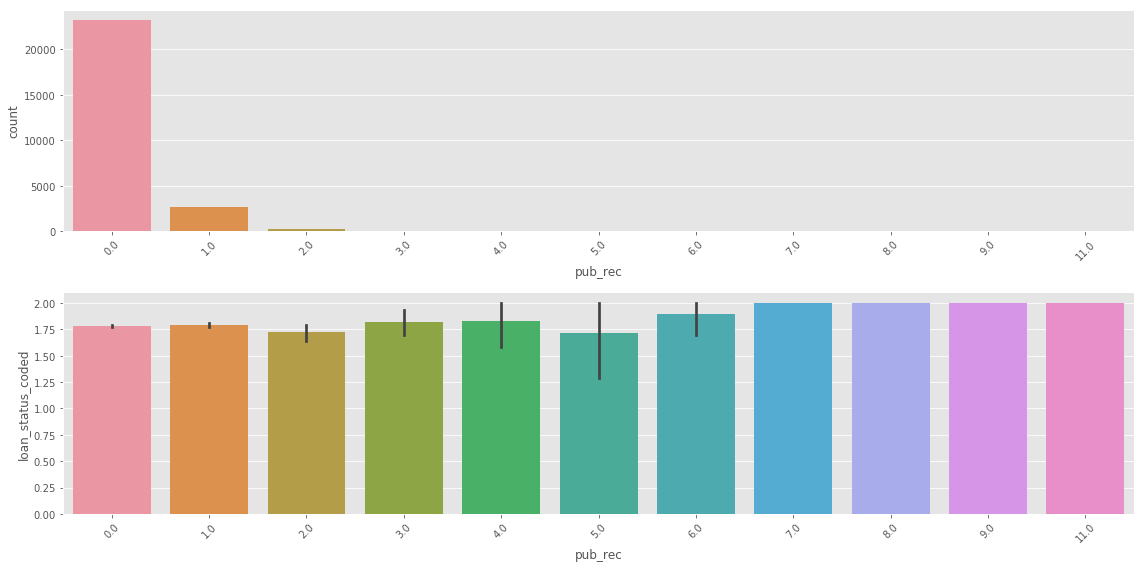

In [39]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(dataset["pub_rec"])
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x="pub_rec", y="loan_status_coded", data=dataset)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### revol_bal
revol_bal: Total credit revolving balance

(0, 100000)

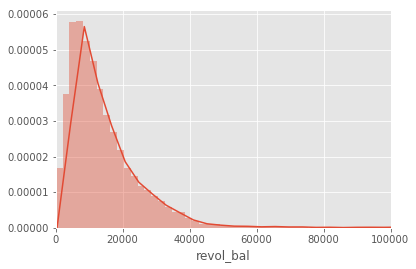

In [40]:
sns.distplot(dataset.revol_bal, bins=250)
plt.xlim(0,100000)

### revol_util
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

(0, 150)

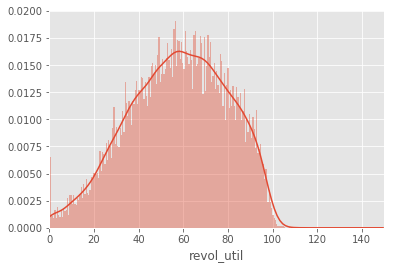

In [41]:
sns.distplot(dataset.revol_util, bins=250)
plt.xlim(0,150)

### total_acc
total_acc: The total number of credit lines currently in the borrower's credit file

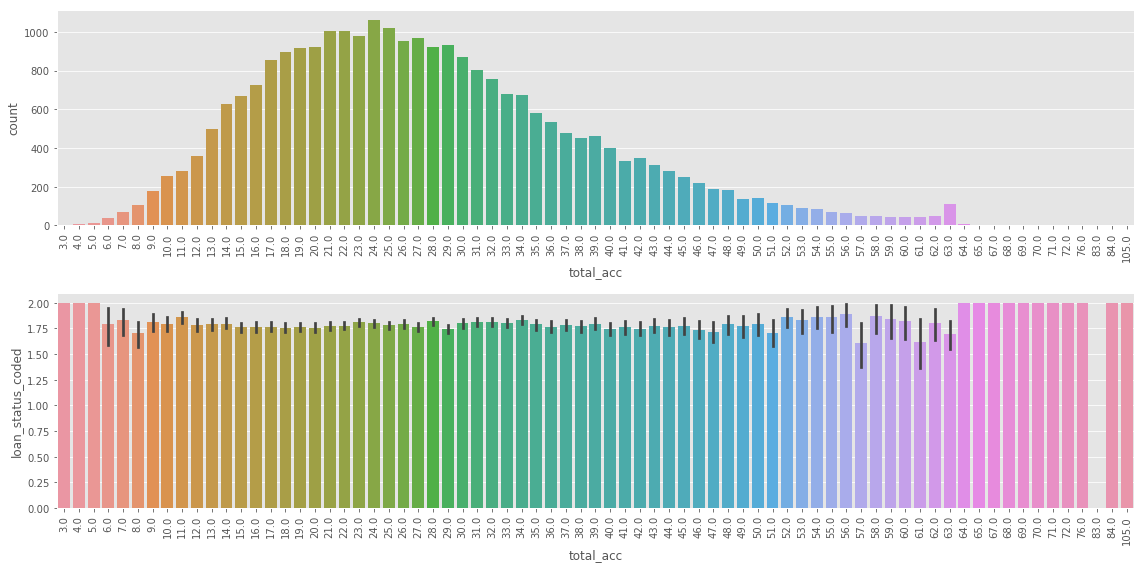

In [42]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(dataset["total_acc"])
plt.xticks(rotation="vertical")
plt.subplot(2,1,2)
sns.barplot(x="total_acc", y="loan_status_coded", data=dataset)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

### initial_list_status
initial_list_status: The initial listing status of the loan. Possible values are – W, F

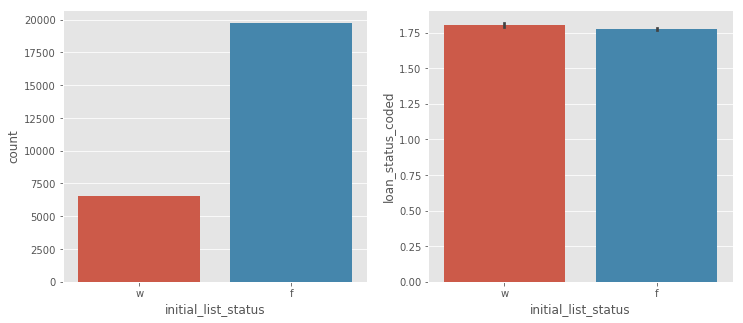

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["initial_list_status"])
plt.subplot(1,2,2)
sns.barplot(x="initial_list_status", y="loan_status_coded", data=dataset)
plt.show()

### total_pymnt, total_pymnt_inv
total_pymnt: Payments received to date for total amount funded

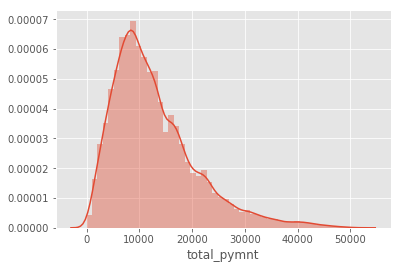

In [44]:
sns.distplot(dataset["total_pymnt"])

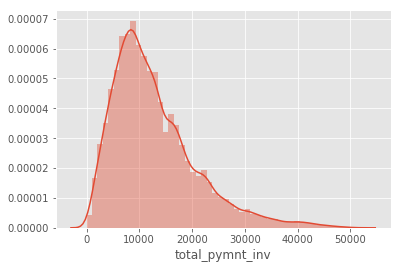

In [45]:
sns.distplot(dataset["total_pymnt_inv"])

### total_rec_prncp, total_rec_int, total_rec_late_fee
total_rec_prncp: Principal received to date

total_rec_int: Interest received to date

total_rec_late_fee: Late fees received to date

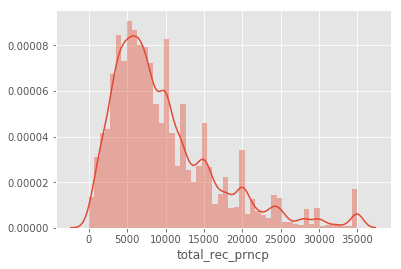

In [46]:
sns.distplot(dataset.total_rec_prncp)

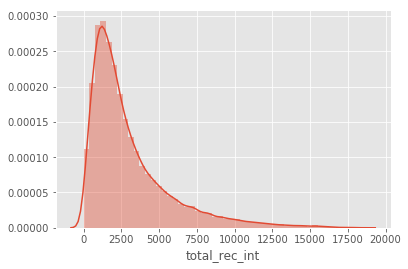

In [47]:
sns.distplot(dataset.total_rec_int)

### last_pymnt_amnt

. Last total payment amount received

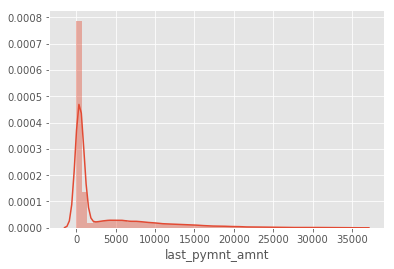

In [48]:
sns.distplot(dataset.last_pymnt_amnt)

### One-hot Encoding
So far, we have confirmed that there are several categorical features. Let's define features and categorical features 

In [49]:
features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
            'installment', 'grade', 'emp_length', 'home_ownership',
            'annual_inc', 'verification_status', 'purpose', 'dti',
            'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
            'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
            'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
            'total_rev_hi_lim', 'loan_status_coded']
categorical = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
               'purpose', 'initial_list_status']

In [50]:
dataset = dataset[features]

One-hot encoding is done using the `get_dummies` from pandas

In [51]:
categorical_variables = categorical
dataset_one_hot_encoded = pd.get_dummies(dataset, columns=categorical_variables)
print("====================[Data Types]====================")
print(dataset_one_hot_encoded.dtypes)

====================[Data Types]====================
loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int                          float64
last_pymnt_amnt                        float64
total_rev_hi_lim                       float64
loan_status_coded                        int64
term_ 3

Now split the dataset into training and testing sets

In [52]:
from sklearn.model_selection import train_test_split
# Train-Test split
y = dataset_one_hot_encoded.loan_status_coded
X = dataset_one_hot_encoded.drop("loan_status_coded", axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [53]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (21032, 61)
Shape of y_train:  (21032,)
Shape of x_test:  (5258, 61)
Shape of y_test:  (5258,)


Most of loan_status_coded is 2 because the original data of loans were safe loans. This can affect our trianing model because just telling that every loan is safe loan can be the best answer in the perspective of accuracy.

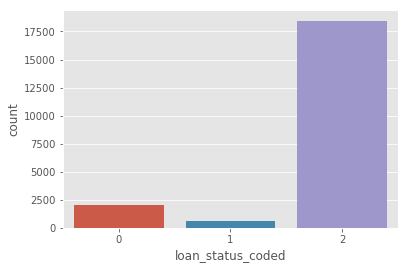

In [54]:
sns.countplot(y_train)

The problem of biased data can be resolved by inserting normalization layer instead of upsampling. Also, optimization goes faster with normalization layer rather than doing updampling.

## Building the Deep Learning model

Lets now build a model for  training using the well-known Keras library with a Tensorflow backend.

In [55]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

def encode_neural_net_y(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    new_y = np_utils.to_categorical(encoded_y)
    return new_y

# Neural Network model
y_train = encode_neural_net_y(y_train)
y_test = encode_neural_net_y(y_test)

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Lets use 2-layer fully connected neural network with 35 neurons in hidden layer. Batch normalization layer is inserted between hidden layer and output layer. The `categorical_crossentropy` is used as loss function and updating method is `ADAM`. Activation for the input layers is `relu` and that for the ouput layer is `softmax`

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization

# create model
model = Sequential()
model.add(Dense(35, input_dim=61, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 35)                2170      
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 108       
Total params: 2,418
Trainable params: 2,348
Non-trainable params: 70
_________________________________________________________________


Lets now train the model for 30 epochs with a batch_size of 40

In [58]:
model.fit(np.array(x_train), np.array(y_train), epochs=30, batch_size=40, verbose=1)

Epoch 1/30
21032/21032 [==============================] - 2s 111us/step - loss: 0.4155 - acc: 0.8832
Epoch 2/30
21032/21032 [==============================] - 2s 97us/step - loss: 0.2403 - acc: 0.9299
Epoch 3/30
21032/21032 [==============================] - 2s 96us/step - loss: 0.2248 - acc: 0.9349
Epoch 4/30
21032/21032 [==============================] - 2s 98us/step - loss: 0.2122 - acc: 0.9391
Epoch 5/30
21032/21032 [==============================] - 2s 94us/step - loss: 0.2060 - acc: 0.9421
Epoch 6/30
21032/21032 [==============================] - 2s 103us/step - loss: 0.1998 - acc: 0.9439
Epoch 7/30
21032/21032 [==============================] - 2s 95us/step - loss: 0.1916 - acc: 0.9475
Epoch 8/30
21032/21032 [==============================] - 2s 105us/step - loss: 0.1858 - acc: 0.9494
Epoch 9/30
21032/21032 [==============================] - 2s 102us/step - loss: 0.1811 - acc: 0.9510
Epoch 10/30
21032/21032 [==============================] - 2s 108us/step - loss: 0.1747 - acc: 0

## Model Evaluation

Lets now observe the test and training set accuracies.

In [59]:
scores = model.evaluate(np.array(x_test), np.array(y_test), verbose=0)
print("====================[TEST SCORE]====================")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

====================[TEST SCORE]====================
acc: 96.50%


In [60]:
scores = model.evaluate(np.array(x_train), np.array(y_train), verbose=0)
print("====================[TRAIN SCORE]====================")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

====================[TRAIN SCORE]====================
acc: 96.55%


Both training and test accuracies are very good. There is no potential overfitting.

## Concluding Remarks

1. The Neural Network model has been trained with relevant features, and an accuracy of 96.5% is achieved on the test data.
2. The model has low bias and low variance as the training and test accuracies are in good ranges.
3. Encoding the target feature to obtain a binary classifier, would definitely expand the accuracy by atleast 3-4%.
4. Effects of adding regularization needs to be evaluated.